    
**ROI** рекламы в приложении **Procrastinate Pro+**.
******************
- **Описание проекта**: исследованиея эффективности инвестиций на рекламу в развлекательном приложении Procrastinate Pro+.
- **Цели и задачи**: несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.
- **Исходные данные**: нам предоставлены данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года (лог сервиса с данными об их посещениях, выгрузка их покупок за этот период и рекламные расходы).
- **План проведения исследования**:
    1. Загрузить и подготовить данные для последующего анализа.
    2. Написать функции для оптимизации расчетов.
    3. Произвести исследовательский анализ данных (профили пользователей, распределение по влияющим факторам).
    4. Оценить маркетинг (общие расходы, расходы в динамике, распределение, стоимость привлечения).
    5. Произвести анализ окупаемости.
    6. Проверить конверсию и удержание.
    7. Проверить гипотизу.
    8. Описать результаты исследования.
    9. Сформулировать рекоммендации.
    

### Загрузка и предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# загрузим данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
# посмотрим на датафрейм visits
display(visits.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Датафрейм `visits` состоит из колонок:
- `User Id` уникальный идентификатор пользователя,
- `Region` страна пользователя,
- `Device` тип устройства пользователя,
- `Channel` идентификатор источника перехода,
- `Session Start` дата и время начала сессии,
- `Session End` дата и время окончания сессии.

In [3]:
visits = visits.rename(
    columns={'User Id': 'user_id',
            'Region' : 'region',
            'Device' : 'device',
            'Channel' : 'channel',
            'Session Start' : 'session_start',
            'Session End' : 'session_end'}
)
display(visits.head(5))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Для соблюдения стилистического правила, приведем название колонок к нижнему регистру.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Датафрейм состоит из **6** колонок и **309901** строк. В колонках с датами необходимо поменять формат на *datetime*.

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Исправили формат.

In [6]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропусков не обнаружено.

In [7]:
visits.duplicated().sum()

0

Дубликатов не обнаружено.

In [8]:
display(orders.head(5))

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Датафрейм `orders` состоит из:
- `User Id` уникальный идентификатор пользователя,
- `Event Dt` дата и время покупки,
- `Revenue` сумма заказа.

In [9]:
orders = orders.rename(
    columns={'User Id': 'user_id',
            'Event Dt' : 'event_dt',
            'Revenue' : 'revenue'}
)
display(orders.head(5))

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Для соблюдения стилистического правила, приведем название колонок к нижнему регистру.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Датафрейм состоит из **3** колонок и **40212** строк. В колонках с датами необходимо поменять формат на *datetime*.

In [11]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Исправили формат.

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Пропусков не обнаружено.

In [13]:
orders.duplicated().sum()

0

Дубликатов не обнаружено.

In [14]:
display(costs.head(5))

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Датафрейм `costs` состоит из:
- `dt` дата проведения рекламной компании,
- `Channel` идентификатор рекламного источника,
- `costs` расходы на компанию.

In [15]:
costs = costs.rename(
    columns={'Channel': 'channel'}
)
display(costs.head(5))

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Для соблюдения стилистического правила, приведем название колонок к нижнему регистру.

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Датафрейм состоит из **3** колонок и **1800** строк. В колонках с датами необходимо поменять формат на *datetime* и округлить до даты.

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропуски не обнаружены.

In [19]:
costs.duplicated().sum()

0

Дубликаты не обнаружены.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функции для вычисления значений метрик

##### Функция get_profiles()
- *для создания профилей пользователей*

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


##### Функция get_retention() 
- *для подсчёта Retention Rate*

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция get_conversion() 
- *для подсчёта конверсии*

In [22]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция get_ltv()
- *для подсчёта LTV*

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

##### Функция filter_data() 
- *для сглаживания данных*

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция plot_retention() 
- *для построения графика Retention Rate*

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция plot_conversion() 
- *для построения графика конверсии*

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция plot_ltv_roi 
- *для визуализации LTV и ROI*

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Профили пользователей

In [28]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Используя функцию `get_profiles` составили таблицу профилей пользователей приложения.

In [29]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(min_analysis_date)
print(max_analysis_date)

2019-05-01
2019-10-27


Отпеределили минимальную **(01 мая 2019)** и максимальную **(27 октября 2019)** даты привлечения пользователей. Они соответствуют интервалу указанному в задаче.   

#### Распределение по странам

In [30]:
user_count = profiles['user_id'].nunique()
print('Общее количество уникальных пользователей {} человек'.format(user_count))

Общее количество уникальных пользователей 150008 человек


In [31]:
# напишем функцию для распределения по признаку
def share (n, i):
    user_count = 150008
    share = n.pivot_table(index=i, columns='payer',\
        values='user_id', aggfunc='count') # выберем данные
    share.columns = ['not_payer', 'payer'] # переименуем колонки
    share['total'] = share['not_payer'] + share['payer'] # добавим колонку total
    share['share_total'] = share['total']/user_count*100 # определим % от общего
    share['share_payer'] = share['payer']/share['total']*100 # определим % платильщиков
    share = share.sort_values(by='total', ascending=False) # отсортируем по убыванию
    share = share.reset_index()# добавим индекс
    
    return share
    
    

Напишем функцию для расчета распределения по таблице `profiles`.

In [32]:
# используя функцию share посмотрим на распределение по регионам
region_share = share(profiles, profiles['region'])
region_share

,region,not_payer,payer,total,share_total,share_payer
0,United States,93100,6902,100002,66.664445,6.901862
1,UK,16875,700,17575,11.716042,3.982930
2,France,16787,663,17450,11.632713,3.799427
3,Germany,14365,616,14981,9.986801,4.111875


Пользователи распределились по **4** регионам следующим образом:
- на **1** месте **United States** с 66,66% от общего количества или 100 002 чел. из них только **6,9%** являются *платильщиками*.
- на **2** месте **UK** с 11,71% от общего количества или 17 575 чел. из них только **3,98%** являются *платильщиками*.
- на **3** месте **France** с 11,63% от общего количества или 17 450 чел. из них только **3,79%** являются *платильщиками*.
- на **4** месте **Germany** с 9,98% от общего количества или 14 981 чел. из них только **4,11%** являются *платильщиками*.

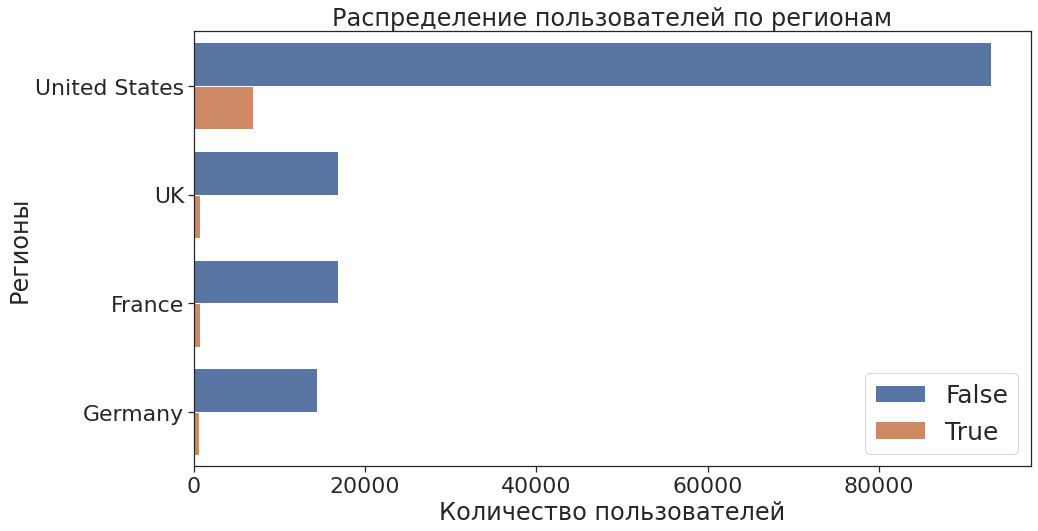

In [33]:
# сгруппируем данные для графика
profiles_user = profiles.groupby(['region', 'payer'],\
              as_index = False)[['user_id']].count()
profiles_user = profiles_user.sort_values(by='user_id', ascending=False)
# выберем стиль графика
sns.set_style('white')
sns.set_theme(style="ticks", font_scale=2.0)
# назначаем размер графика
plt.figure(figsize=(15, 8))
# строим столбчатый график средствами seaborn
sns.barplot(x='user_id', y='region', data=profiles_user, hue='payer')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение пользователей по регионам')
plt.xlabel('Количество пользователей')
plt.ylabel('Регионы')
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=25)
# отображаем график на экране
plt.show()

Построим график для наглядной визуализации наших наблюдений. К сожалению показатель платильщиков шлишком мал, чтоб его значения считывались из визуализации.

#### Распределение по используемым устройствам

In [34]:
# используя функцию share посмотрим на распределение по устройствам
device_share = share(profiles, profiles['device'])
device_share

,device,not_payer,payer,total,share_total,share_payer
0,iPhone,51097,3382,54479,36.317396,6.207897
1,Android,32982,2050,35032,23.353421,5.851793
2,PC,28918,1537,30455,20.302251,5.046790
3,Mac,28130,1912,30042,20.026932,6.364423


Пользователи распределились по **4** устройствам следующим образом:
- на **1** месте **iPhone** с 36,31% от общего количества или 54 479 чел. из них только **6,2%** являются *платильщиками*.
- на **2** месте **Android** с 23,35% от общего количества или 35 032 чел. из них только **5,85%** являются *платильщиками*.
- на **3** месте **PC** с 20,30% от общего количества или 30 455 чел. из них только **5,04%** являются *платильщиками*.
- на **4** месте **Mac** с 20,02% от общего количества или 30 042 чел. из них только **6,36%** являются *платильщиками*.

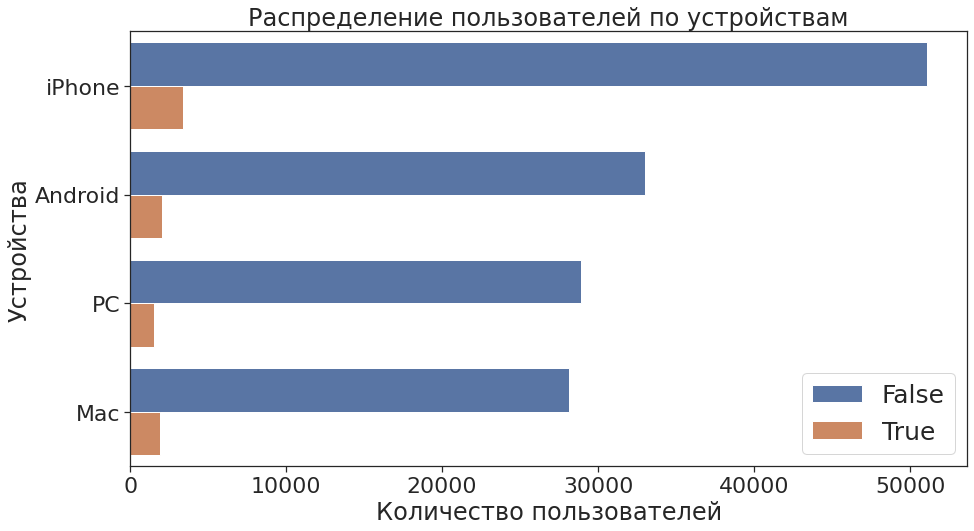

In [35]:
# сгруппируем данные для графика
profiles_user = profiles.groupby(['device', 'payer'],\
              as_index = False)[['user_id']].count()
profiles_user = profiles_user.sort_values(by='user_id', ascending=False)
# выберем стиль графика
sns.set_style('white')
sns.set_theme(style="ticks", font_scale=2.0)
# назначаем размер графика
plt.figure(figsize=(15, 8))
# строим столбчатый график средствами seaborn
sns.barplot(x='user_id', y='device', data=profiles_user, hue='payer')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение пользователей по устройствам')
plt.xlabel('Количество пользователей')
plt.ylabel('Устройства')
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=25)
# отображаем график на экране
plt.show()

Построим график для визуализации наших наблюдений. **IPhone** отчетливо выделяется, как по общему количеству, так и количеству платильщиков.

#### Распределение по каналам привлечения

In [36]:
# используя функцию share посмотрим на распределение по каналам привлечения
channel_share = share(profiles, profiles['channel'])
channel_share

,channel,not_payer,payer,total,share_total,share_payer
0,organic,55279,1160,56439,37.623993,2.055316
1,FaceBoom,25587,3557,29144,19.428297,12.204914
2,TipTop,17683,1878,19561,13.039971,9.600736
3,OppleCreativeMedia,8372,233,8605,5.736361,2.707728
4,LeapBob,8291,262,8553,5.701696,3.063253
5,WahooNetBanner,8100,453,8553,5.701696,5.296387
6,RocketSuperAds,4096,352,4448,2.965175,7.913669
7,MediaTornado,4208,156,4364,2.909178,3.574702
8,YRabbit,4147,165,4312,2.874513,3.826531
9,AdNonSense,3440,440,3880,2.586529,11.340206


Пользователи распределились по **11** каналам привлечения следующим образом:
- на **1** месте **organic** с 37,62% от общего количества или 56 439 чел. из них только **2,05%** являются *платильщиками*.
- на **2** месте **FaceBoom** с 19,42% от общего количества или 29 144 чел. из них только **12,20%** являются *платильщиками*.
- на **3** месте **TipTop** с 13,03% от общего количества или 19 561 чел. из них только **9,60%** являются *платильщиками*.
- на **4** месте **OppleCreativeMedia** с 5,73% от общего количества или 8 605 чел. из них только **2,70%** являются *платильщиками*.
- на **5** месте **LeapBob** с 5,70% от общего количества или 8 553 чел. из них только **3,06%** являются *платильщиками*.
- на **6** месте **WahooNetBanner** с 5,70% от общего количества или 8 553 чел. из них только **5,29%** являются *платильщиками*.
- на **7** месте **RocketSuperAds** с 2,96% от общего количества или 4 448 чел. из них только **7,91%** являются *платильщиками*.
- на **8** месте **MediaTornado** с 2,90% от общего количества или 4 364 чел. из них только **3,57%** являются *платильщиками*.
- на **9** месте **YRabbit** с 2,87% от общего количества или 4 312 чел. из них только **3,82%** являются *платильщиками*.
- на **10** месте **AdNonSense** с 2,58% от общего количества или 3 880 чел. из них только **11,34%** являются *платильщиками*.
- на **11** месте **lambdaMediaAds** с 1,43% от общего количества или 2 149 чел. из них только **10,46%** являются *платильщиками*.

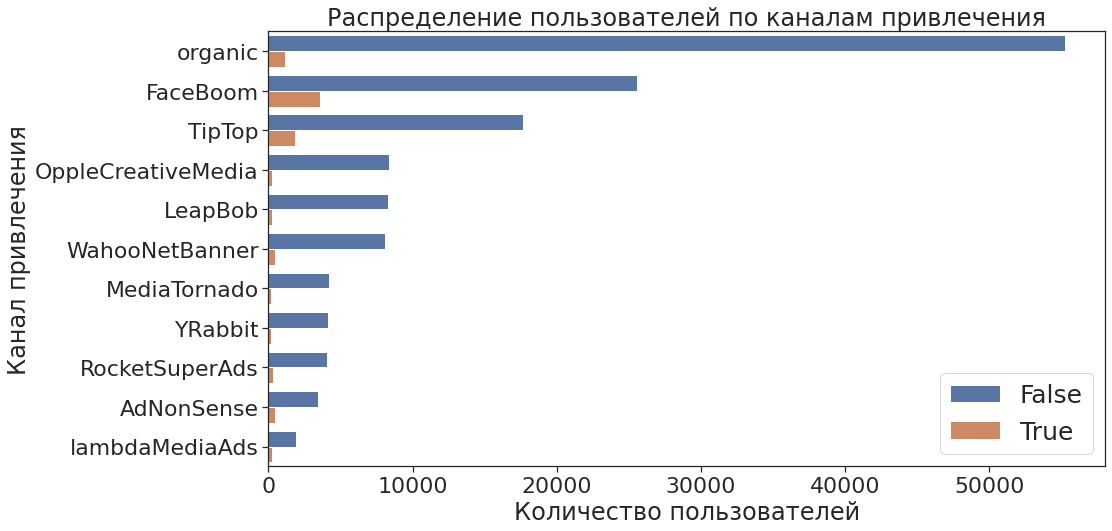

In [37]:
# сгруппируем данные для графика
profiles_user = profiles.groupby(['channel', 'payer'],\
              as_index = False)[['user_id']].count()
profiles_user = profiles_user.sort_values(by='user_id', ascending=False)
# выберем стиль графика
sns.set_style('white')
sns.set_theme(style="ticks", font_scale=2.0)
# назначаем размер графика
plt.figure(figsize=(15, 8))
# строим столбчатый график средствами seaborn
sns.barplot(x='user_id', y='channel', data=profiles_user, hue='payer')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение пользователей по каналам привлечения')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=25)
# отображаем график на экране
plt.show()

Построим график для визуализации наших наблюдений. Количество пользователей пришедших без рекламы (**organic**) заметно больше остальных, но платильщиков пришедших от **FaceBoom** и **TipTop** больше.

In [38]:
country_channel = profiles.pivot_table(
index='channel', columns='region', values='user_id', aggfunc='nunique')
country_channel

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


Дополнительно посмотрим на распределение пользователей по странам и каналам привлечения. Видим, что каналы **TipTop, FaceBoom, MediaTornado, YRabbit и RocketSuperAds** работают только в **United States**. Остальные каналы относятся к **Европе**.


#### Промежуточные итоги в части исследования профилей

  
- всего пользователей **150 008** человек.
- на долю **United States** приходится **66.66%** всех пользователей.
- доля платящих в **United States** составляет **6.9%**, что почти в **2** раза выше чем в европейских странах.
- по устройствам лидируют мобильные устройства, на первом месте **iPhone** с **36,31%**, но в целом пользователи устройств на системе **iOS** являются платильщиками чаще, в среднем на **0.5%**.
- **органические** пользователи составляют **37.6%** от общего числа.
- **FaceBoom** является не только лиделом среди платных каналов по количеству пользователей, их **19.4%** от общего числа, но и лиделом по соотношению платильщиков, их **12.2%**.
- на **TipTop** приходится **13%** из которых **9.6%** платильщики, остальные каналы занимают доли не превышающие **5%** порог.
- **5 из 10** каналов, располагаются в **United States**. Остальные каналы представлены по всей **Европе** и имеют довольно ровное распределение.


### Маркетинг

#### Расходы на маркетинг

In [39]:
marketing_expenses = costs['costs'].sum()
print('Суммарные расходы на рекламу составили {} '. format(marketing_expenses))

Суммарные расходы на рекламу составили 105497.30000000002 


#### Распределение расходов на маркетинг по каналам привлечения

In [40]:
marketing_expenses_channel = profiles.pivot_table(
index='channel', values='acquisition_cost', aggfunc='sum')
marketing_expenses_channel['share'] = marketing_expenses_channel['acquisition_cost']/marketing_expenses*100
marketing_expenses_channel = marketing_expenses_channel.sort_values(by='acquisition_cost', ascending=False)
marketing_expenses_channel = marketing_expenses_channel.reset_index()
marketing_expenses_channel

,channel,acquisition_cost,share
0,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
2,WahooNetBanner,5151.00,4.882589
3,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
6,LeapBob,1797.60,1.703930
7,lambdaMediaAds,1557.60,1.476436
8,MediaTornado,954.48,0.904744
9,YRabbit,944.22,0.895018


Расходы по каналам привлечения распределились следующим образом:
- **1** место **TipTop** 54 751, что составляет **51,89%** от общей суммы.
- **2** место **FaceBoom** 32 445, что составляет **30,75%** от общей суммы.
- **3** место **WahooNetBanner** 5 151, что составляет **4,88%** от общей суммы.
- **4** место **AdNonSense** 3 911, что составляет **3,70%** от общей суммы.
- **5** место **OppleCreativeMedia** 2 151, что составляет **2,03%** от общей суммы.
- **6** место **RocketSuperAds** 1 833, что составляет **1,73%** от общей суммы.
- **7** место **LeapBob** 1 797, что составляет **1,70%** от общей суммы.
- **8** место **lambdaMediaAds** 1 557, что составляет **1,47%** от общей суммы.
- **9** место **MediaTornado** 954, что составляет **0,90%** от общей суммы.
- **10** место **YRabbit** 944, что составляет **0,89%** от общей суммы.

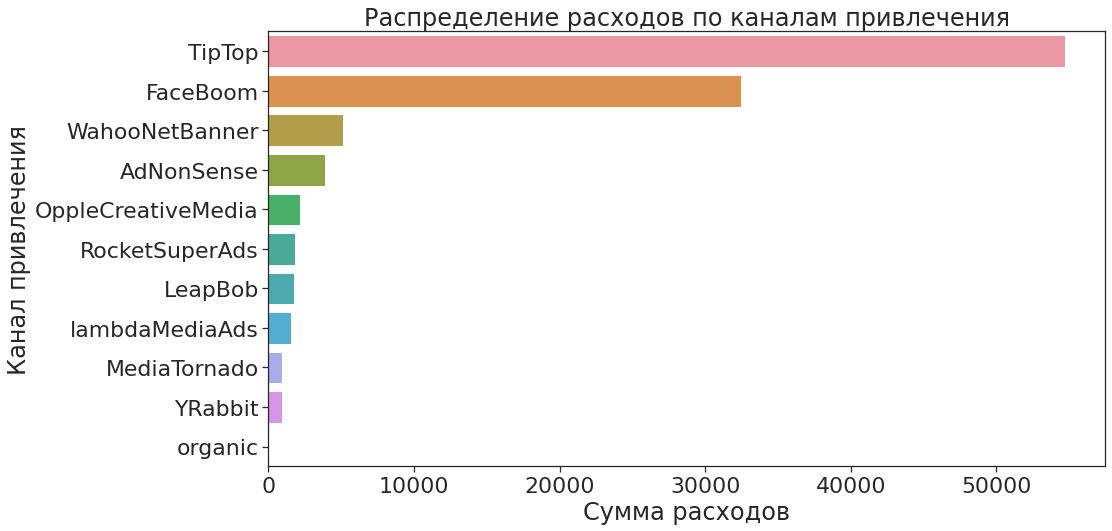

In [41]:
sns.set_style('white')
sns.set_theme(style="ticks", font_scale=2.)
plt.figure(figsize=(15, 8))
sns.barplot(x='acquisition_cost', y='channel', data=marketing_expenses_channel)
plt.title('Распределение расходов по каналам привлечения')
plt.xlabel('Сумма расходов')
plt.ylabel('Канал привлечения')

plt.show()

Визуализируем наши наблюдения на графике.

#### Динамика изменений расходов во времени

In [42]:
# Добавим в прифили новые колонки в формате недели и месяца
profiles['week'] = profiles['dt'].astype('datetime64[W]')
profiles['month'] = profiles['dt'].astype('datetime64[M]')
profiles.head(3)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-02
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019-07-04
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,2019-09-26


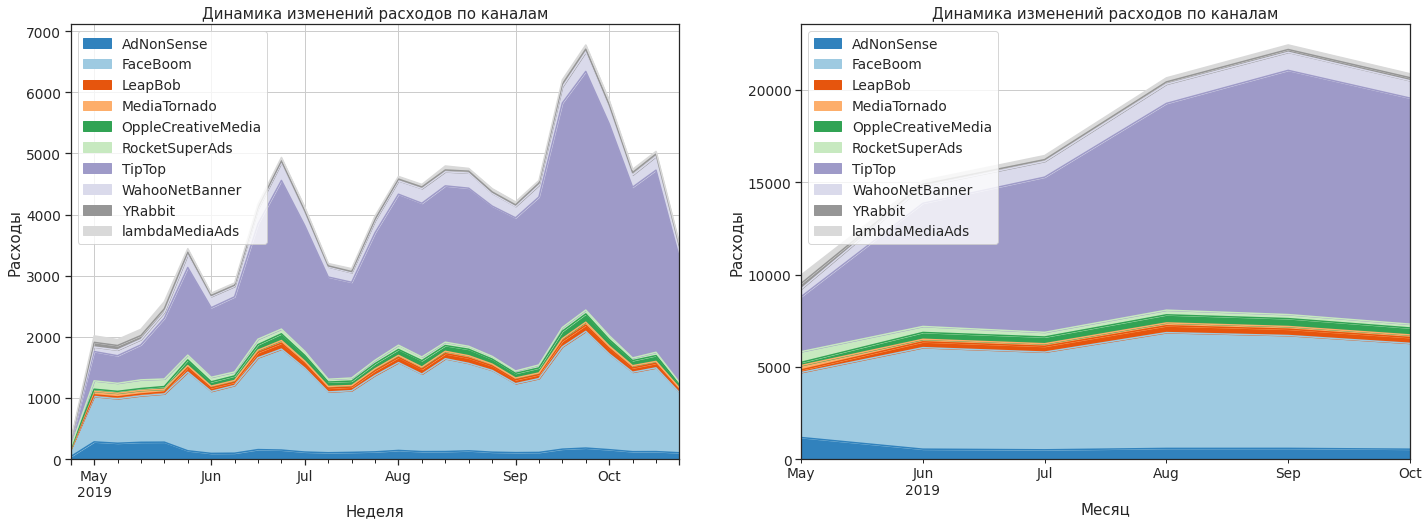

In [43]:
# Построим график динамики расходов на привлечение (по неделям и месяцам) для каждого канала
plt.figure(figsize=(24, 8)) # зададим размер графика
sns.set_theme(style="ticks", font_scale=1.25) # добавим параметр размера подписи
# выберем данные за неделю и сформируем в первом графике
profiles.query('channel != "organic"').pivot_table(index='week', 
    columns='channel',values='acquisition_cost', aggfunc='sum').plot.area(
    grid=True, ax=plt.subplot(1, 2, 1), cmap='tab20c')
plt.title('Динамика изменений расходов по каналам')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(loc='upper left')

# выберем данные за месяц и сформируем во втором графике
profiles.query('channel != "organic"').pivot_table(index='month', 
    columns='channel',values='acquisition_cost', aggfunc='sum').plot.area(
    grid=True, ax=plt.subplot(1, 2, 2), cmap='tab20c')
plt.title('Динамика изменений расходов по каналам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(loc='upper left')

plt.show()

На графике динамики расходов по каналам привлечения видим, что в разрезе недельного показателя, лидер **TipTop** показывает высокую валатильность, чуть большую стабильность показывает канал **FaceBoom**, у остальных расходы больее стабильные. 

#### Стоимость привлечения одного ползователя (САС)

In [44]:
cac_chennel = profiles.pivot_table(
      index='channel', values='acquisition_cost',
      aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)
cac_chennel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


По показателю **САС** мы видим, что стоимость привлечения у тройки лидеров, выше **1**, а у лидера **TipTop** цена значительно выше и составляет **2,79**.

In [45]:
profiles = profiles[profiles['channel'] != 'organic']

  
В дальнейшем анализе нас будут интересовать только пользователи привлеченные по платным каналам, поэтому **organic** исключим из выборки.


In [46]:
involved_user = profiles['user_id'].nunique()
cac_general = marketing_expenses/involved_user
cac_general

1.127481323942759

    
Посчитали общий показатель **САС**, он составляет **1.12**, что говорит об общей убыточности.


#### Промежуточные итоги в части маркетинга

 
- общие расходы на рекламу составили **105 497**.
- показатель **САС** для всего пректа составил **1.12**, что свидетельствует об общей **убыточности**.
- **3 из 10** каналов привличения, **превышают** границу рентабельности.
- с мая по сентябрь, расходы на привлечение **выросли** более чем в **2 раза**.
- основное увеличение расходов отмечаем по каналу **TipTop**
- на два канала лидера **TipTop и FaceBoom** приходится **82,6%** всего рекламного бюджета.


### Анализ окупаемости рекламы

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

In [47]:
# зададим момент анализа
observation_date = datetime(2019, 11, 1).date()
# зададим горизонт анализа
horizon_days = 14

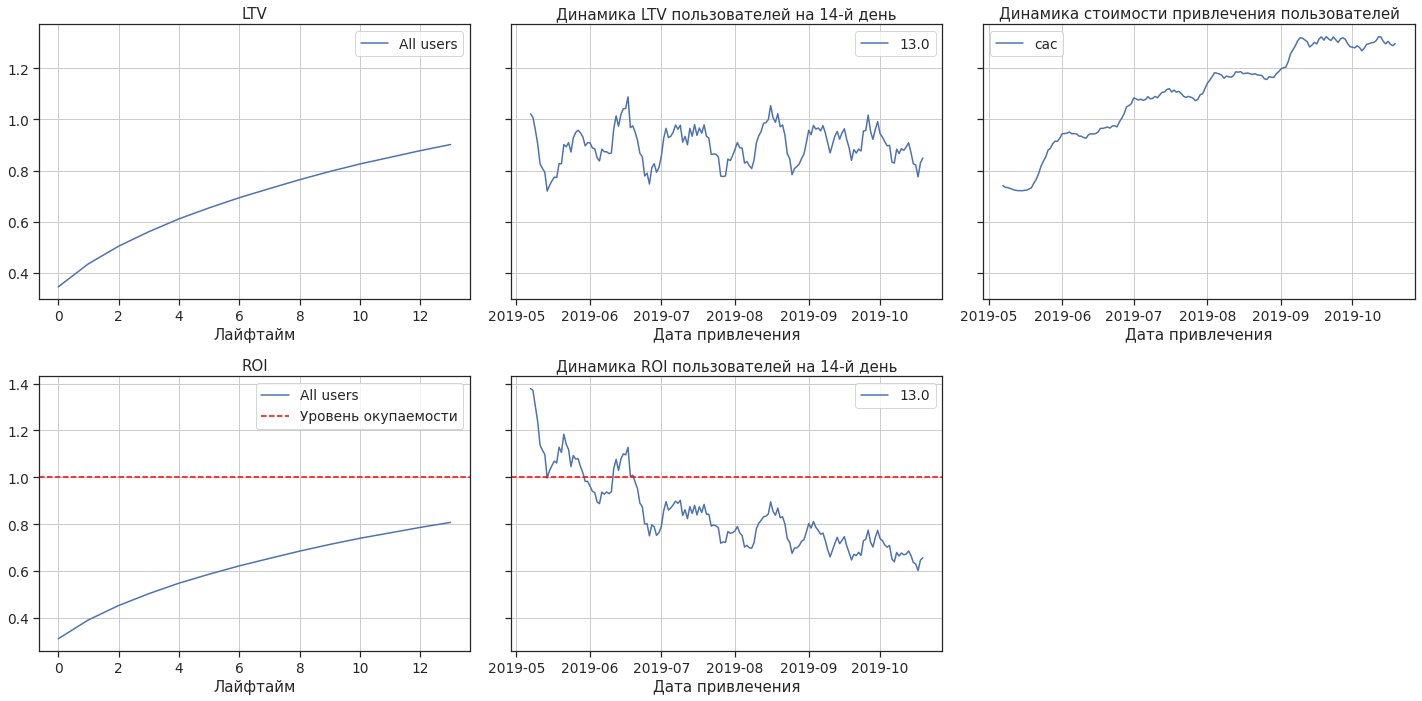

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков можно сделать вывод:
- **LTV** стабильный, но в динамике на 14-й день показывает пиковые значения примерно каждые 3 недели.
- **ROI** по достижению 14 дней, показывает значение **0.8** к момету рентабельности. Реклама не окупается.
- **ROI** в динамике на 14-й день показывает снижение. В середине мая падение до уровня себестоимости, потом рост до уровня**1.2** на протяжении 2 недель и новое падение которое опустилось ниже уровня себестоимости, к отметки **0.9**. По итогу, с середены июля **ROI** стабильно ниже уровня рентабильности.
- **CAC** показывает противоположную динамику от **ROI**. В середине мая стоимость привлечения показывает резкий рост (пик приходится на дату падения в уровень себестоимости), а далее стабильный рост в течении 4 месяцев.


#### Анализ окупаемости рекламы по устройствам

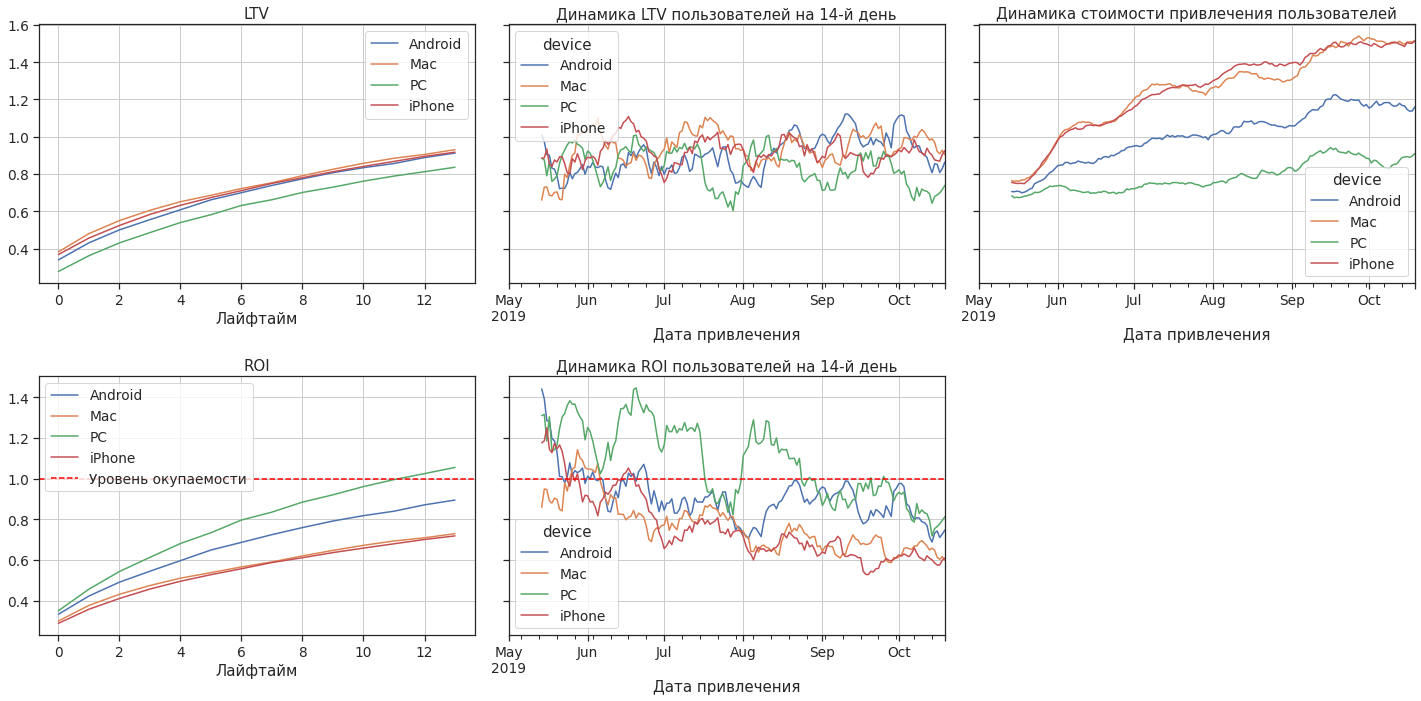

In [49]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По данным графиков окупаемости по устройствам, можно сделать вывод:
- **ROI** привлечение для **PC** окупается уже через 11 дней. **Android** на 13 день показывает показатель в **0.9**, а пользователи **iOS** платформ не превышают показатель в **0.7**.
- **CAC** с середины мая сильно вырос для iOS платформ, **Android** тоже подорожал но не так сильно. Стоимость привлечения пользователей на **PC** пострадала менее всего.
- **ROI** в динамике на **14** день, показывает положительные показатели только у **PC**, но и они проваливаются ниже уровня во второй половине июля, потом следует подъем в течении августа и с сентября они уже тоже за порогом рентабельности.

#### Анализ окупаемости рекламы по странам

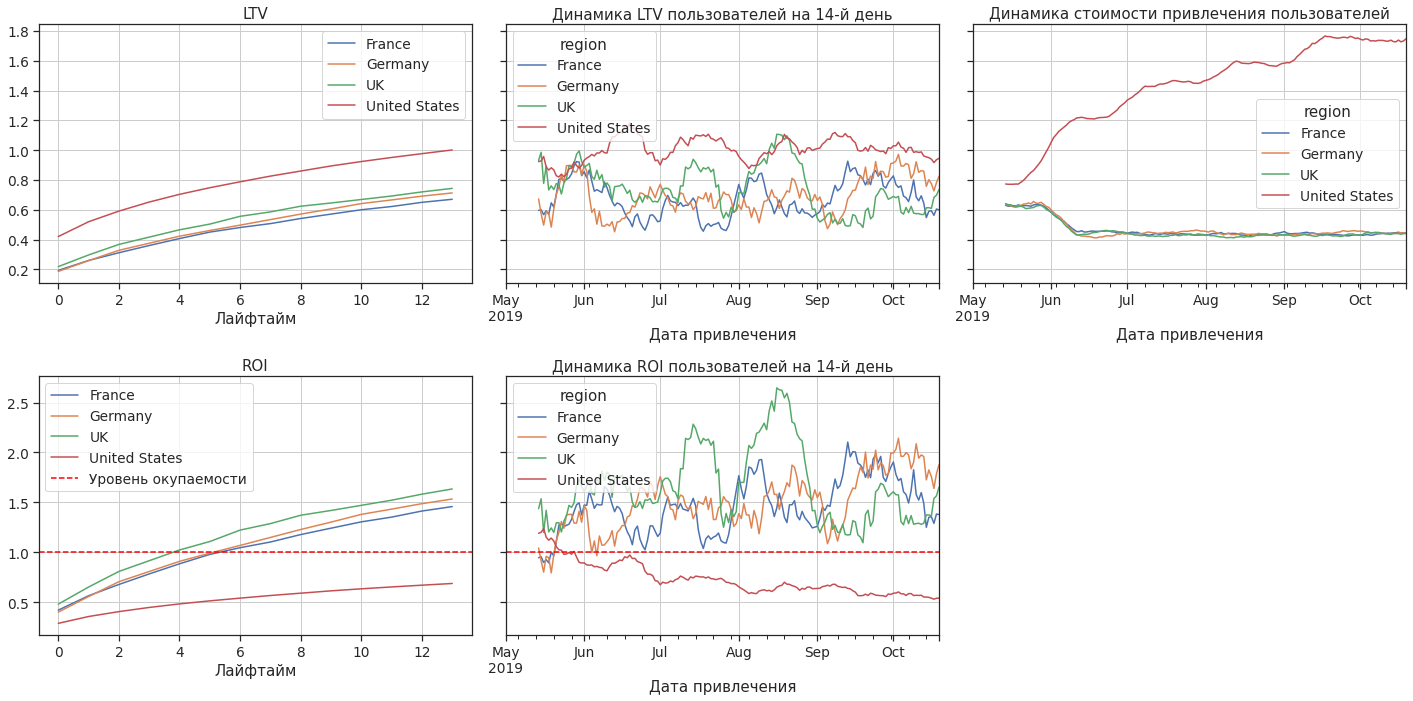

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


На графиках окупаемости по странам можем наблюдать:
- **LTV** стабилен и самые высокие показатели у **United States**
- **ROI** у **United States** не выходит за рамки себестоимости, а так как это самый многочисленный (с точки зрения пользователей) регион, своими убытками он перекрывает прибыть оставшихся.
- **САС** у **United States** показывает резкий рост с середины июня, по **Европе** отмечаем незначительное падение с конца мая по середину июня, а далее показатель стабилен.
- в динамике **ROI** на 14 день, отмечаем сильную валатильность в **UK** в июне, июле и августе, в сентябре валатильность низкая. Все европейские страны, показывают положительный показатель, что не скажешь в отношении **United States**, он стабильно за порогом рентабельности с конца мая.
  

#### Анализ окупаемости рекламы по каналам привлечения

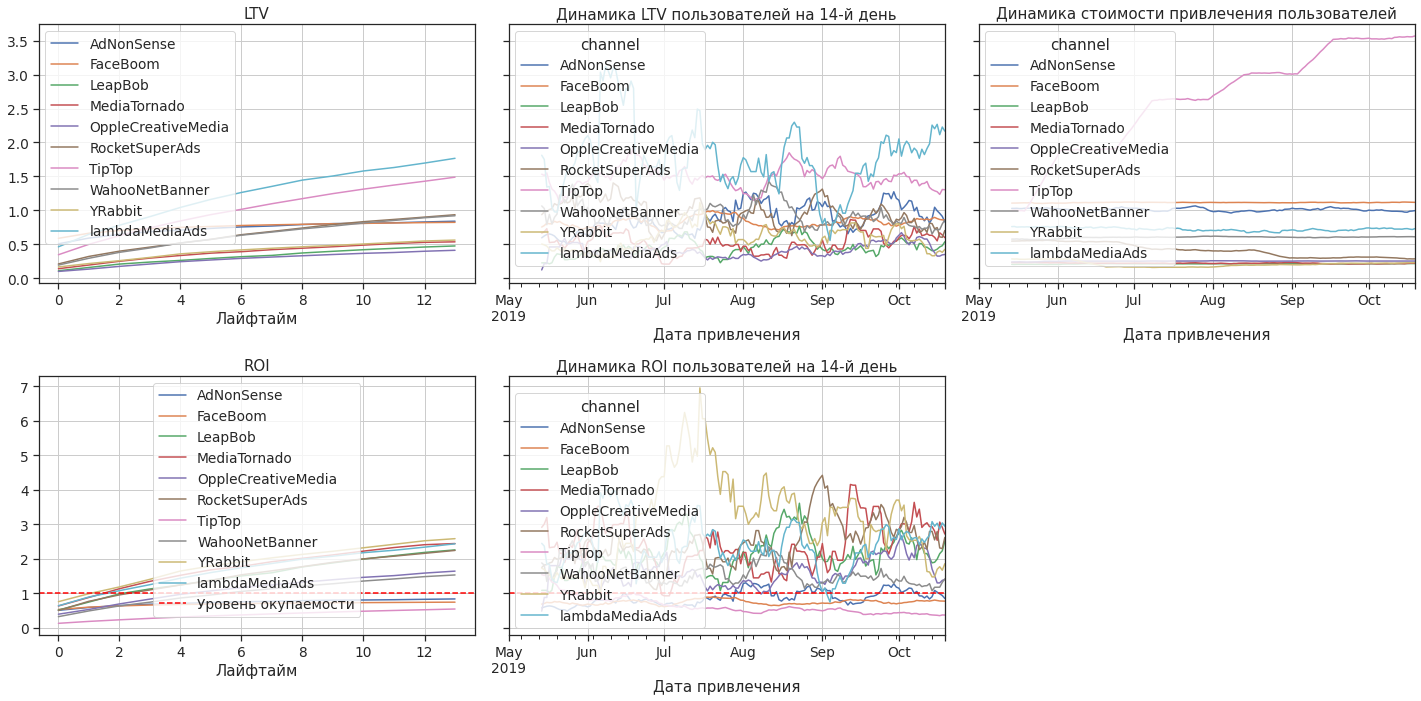

In [51]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На графиках окупаемости по каналам привлечения можем наблюдать:
- **CAC** показывает ступенчатый рост по каналу **TipTop**.
- **ROI** по каналам **TipTop, FaseBoom и AdNonSense** ниже себестоимости. А вот канал **YRaddit** в первую половину июля показал резкий рост.

#### Промежуточные итоги в части окупаемости

   
- **ROI** по достижению **14** дней, показывает значение **0.8** к момету рентабельности. *Реклама не окупается*.
- **ROI** в динамике на **14-й** день показывает снижение. В середине мая падение до уровня *себестоимости*, потом рост до уровня **1.2** на протяжении **2** недель и новое падение которое опустилось ниже уровня себестоимости, к отметки **0.9**. По итогу, с середены июля **ROI** стабильно ниже уровня рентабильности.
- **CAC** показывает противоположную динамику от **ROI**. В середине мая стоимость привлечения показывает резкий рост (пик приходится на дату падения в уровень себестоимости), а далее стабильный рост в течении 4 месяцев.
- **ROI** привлечение для **PC** окупается уже через 11 дней. **Android** на 13 день показывает показатель в **0.9**, а пользователи **iOS** платформ не превышают показатель в **0.7**.
- **CAC** с середины мая сильно вырос для iOS платформ, **Android** тоже подорожал но не так сильно. Стоимость привлечения пользователей на **PC** пострадала менее всего.
- **ROI** в динамике на **14** день, показывает положительные показатели только у **PC**, но и они проваливаются ниже уровня во второй половине июля, потом следует подъем в течении августа и с сентября они уже тоже за порогом рентабельности.
- **LTV** стабилен и самые высокие показатели у **United States**
- **ROI** у **United States** не выходит за рамки себестоимости, а так как это самый многочисленный (с точки зрения пользователей) регион, своими убытками он перекрывает прибыть оставшихся.
- **САС** у **United States** показывает резкий рост с середины июня, по **Европе** отмечаем незначительное падение с конца мая по середину июня, а далее показатель стабилен.
- в динамике **ROI** на 14 день, отмечаем сильную валатильность в **UK** в июне, июле и августе, в сентябре валатильность низкая. Все европейские страны, показывают положительный показатель, что не скажешь в отношении **United States**, он стабильно за порогом рентабельности с конца мая.
- **CAC** показывает ступенчатый рост по каналу **TipTop**.
- **ROI** по каналам **TipTop, FaseBoom и AdNonSense** ниже себестоимости. А вот канал **YRaddit** в первую половину июля показал резкий рост.


### Проверка конверсии и удержания пользователей в динамике 

#### Конверсия и удержание по устройствам

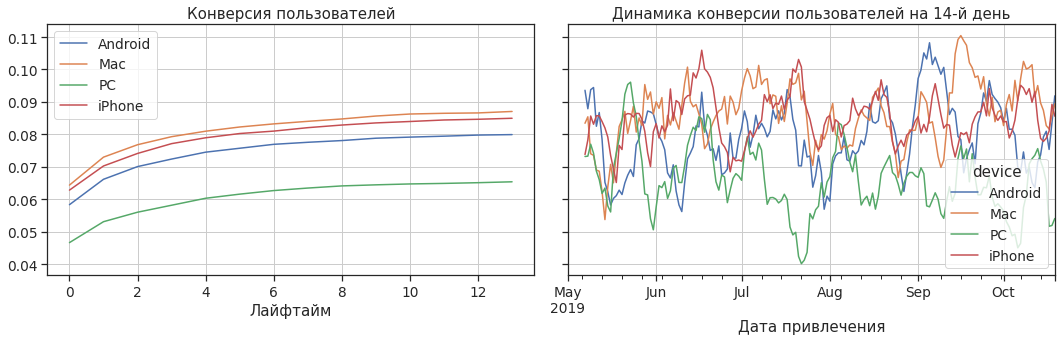

In [52]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По конверсии можем наблюдать:
- Конверсия пользователей iOS (**iPhone и Mac**) выше чем пользователей на **Android**.
- Конверсия в динамике показывает валатильность в среднем каждые 4 недели.

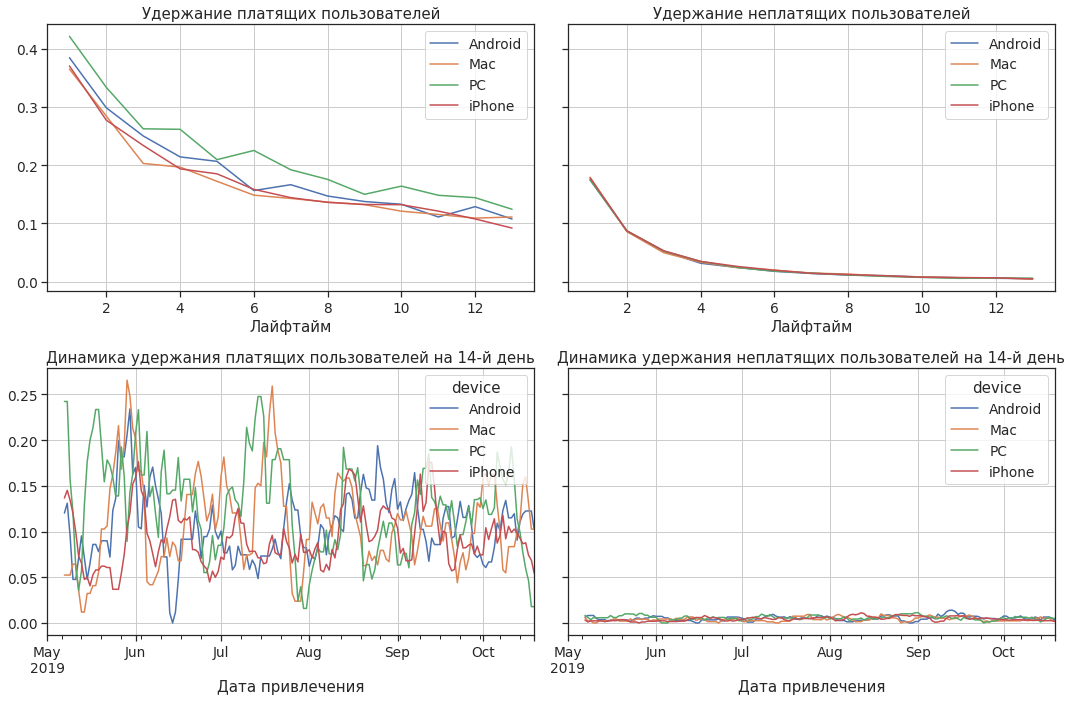

In [53]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графику удержания можно сделать вывод:
- В отличии от конверсии график удержания показывает противоположную картину. Пользователи **Android** и **PC** удерживаются лучше чем пользователи на iOS (**iPhone и Mac**).
- В середине и конце мая, а так же в середине июля, мы наблюдаем резкое увеличение активности пользователей **PC** и **Mac**.

#### Конверсия и удержание по каналам привлечения

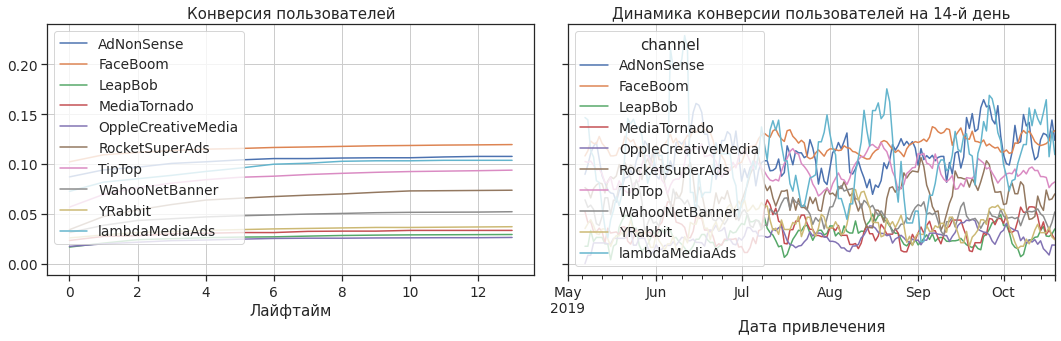

In [54]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

  
По конверсии можем наблюдать:
- Конверсия пользователей по каналу **FaceBoom** выше остальных, но как и большая часть каналов, после небольшого подъема к **2-му** лайфтайму показывает стагнацию и ложится в горизонт.
- Конверсия в динамике на **14-й день** показывает большую валатильность по каналу **IambdaMediaAds**, у **TipTop** динамика скромнее, в среднем подъемы каждые **4** недели, а по каналу **FaceBoom** колебания не значительные, не большая активность в июле и сентябре.

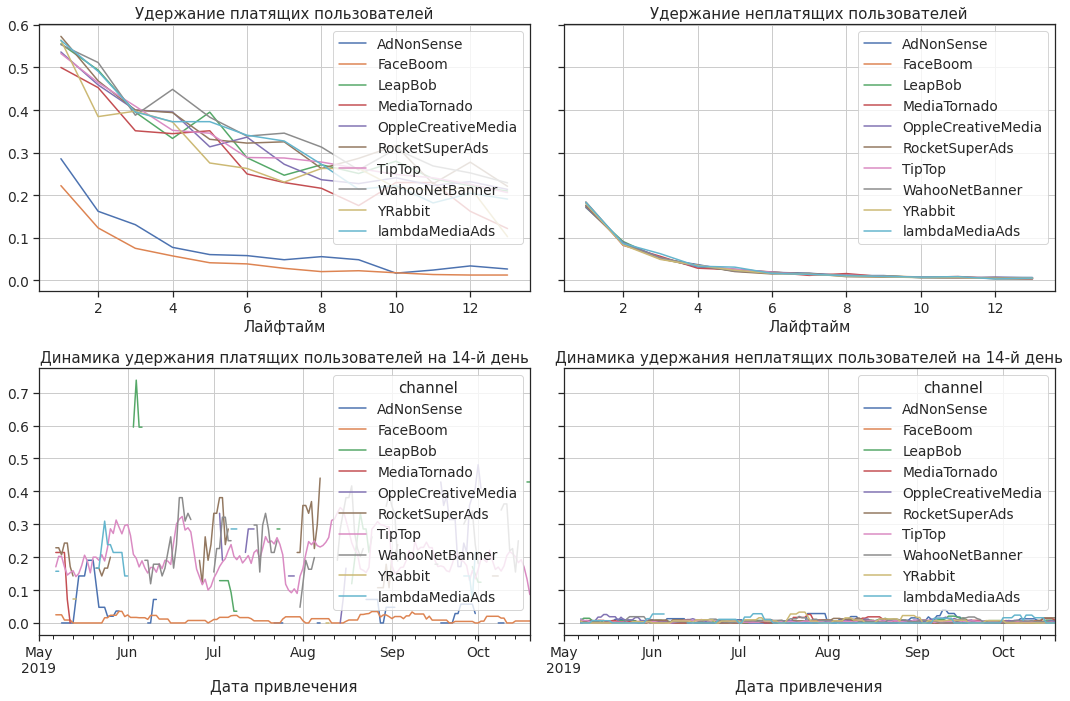

In [55]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

  
По графику удержания можно сделать вывод:
- Сразу бросается в глаза падение в удержании по каналам **FaceBoom и AdNonSense**.
- Динамика удержания на 14-й день показывает практически горизонтальный график по каналу **FaceBoom**, а у **TipTop** колебания от **1.5** до **3** практически каждый месяц. 


#### Конверсия и удержание по регионам

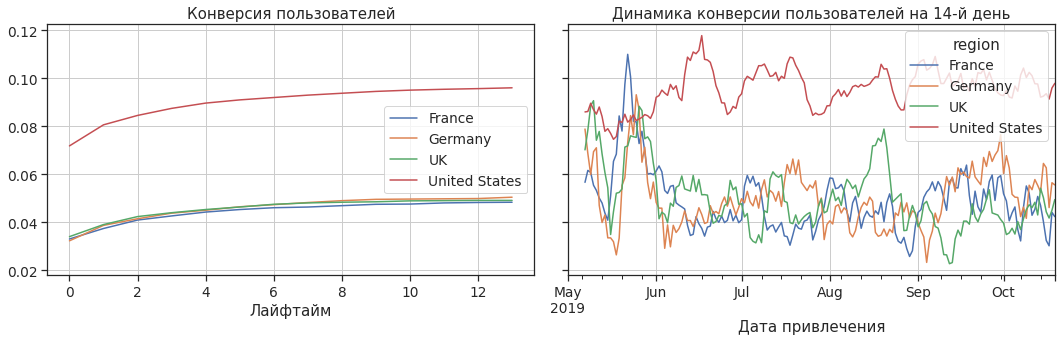

In [56]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


По конверсии можем наблюдать:
- Конверсия пользователей по региону **United States** выше остальных почти в **2** раза.
- Динамика конверсии на **14-й** день показывает хорошую активность **United States** с середины мая и далее каждые **4** недели видим рост и падение в интервале **0.08 - 0.11**. **Европа** наоборот показывает снижение с середины мая с уровня **0.09** до интервала **0.03 - 0.06**.
    

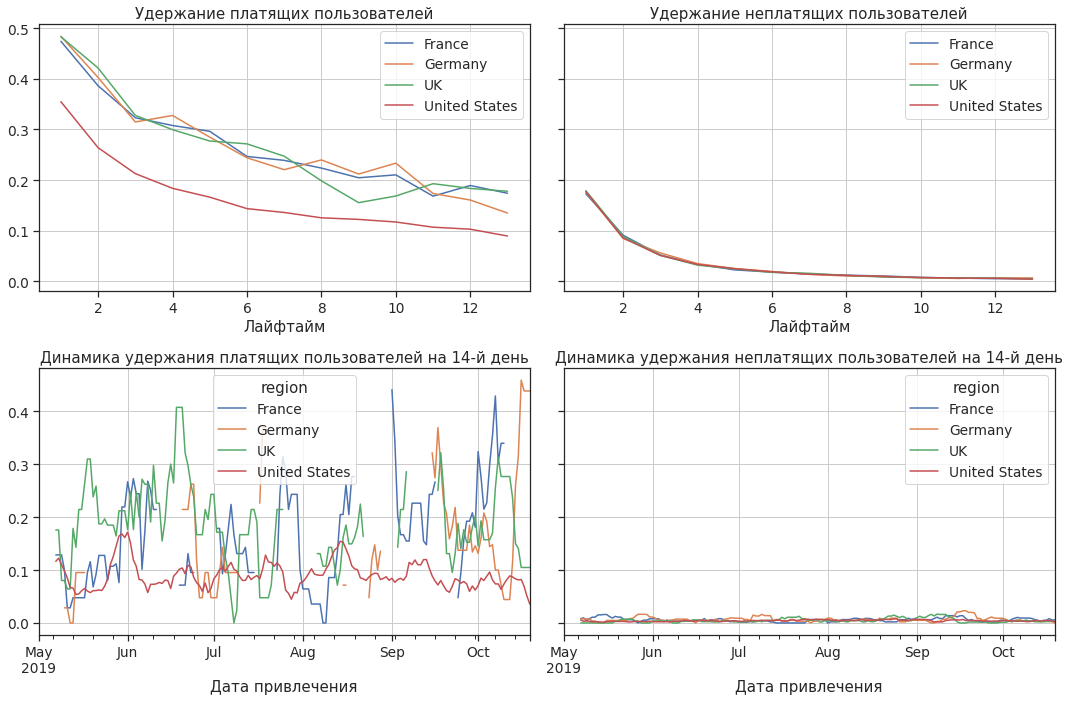

In [57]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

 
По графику удержания можно сделать вывод:
- Сразу бросается в глаза падение в удержании по региону **United States**, а вот **Европа** показывает более положительную динамику в среднем на **0.1**
- Динамика удержания на 14-й день по региону **United States** показывает слабую валатильность, в отличии от **Европы**. 
    

#### Промежуточные итоги в части конверсии и удержания


- Конверсия пользователей **iOS** (iPhone и Mac) выше чем пользователей на **Android**.
- В отличии от конверсии график удержания показывает противоположную картину. Пользователи **PC** и **Android** удерживаются лучше чем пользователи на **iOS** (iPhone и Mac).
- Конверсия пользователей по каналу **FaceBoom** выше остальных, но как и большая часть остальных каналов, после небольшого подъема к **2-му** лайфтайму показывает стагнацию и ложится в горизонт.
- Наблюдается падение в удержании по каналам **FaceBoom и AdNonSense**.
- Динамика удержания на **14-й** день показывает практически горизонтальный график по каналу **FaceBoom**, а у **TipTop** колебания от **1.5** до **3** практически каждый месяц.
- Конверсия пользователей по региону **United States** выше остальных почти в **2** раза.
- Динамика конверсии на **14-й** день показывает хорошую активность **United States** с середины мая и далее каждые **4** недели видим рост и падение в интервале **0.08 - 0.11**. **Европа** наоборот показывает снижение с середины мая с уровня **0.09** до интервала **0.03 - 0.06**.
- Наблюдаем падение в удержании по региону **United States**, а вот **Европа** показывает более положительную динамику в среднем на **0.1**
- Динамика удержания на **14-й** день по региону **United States** показывает слабую валатильность, в отличии от **Европы**.


### Проверка гипотизы


На основании нашего исследования, мы выявили каналы которые влияют на рентабельность. Проверим наши выводы исключив таксичные каналы **TipTop, FaceBoom и AdNonSense** из выборки и посмотрим на показатели **ROI**.
 

In [58]:
profiles = profiles[profiles['channel'] != 'TipTop']
profiles = profiles[profiles['channel'] != 'FaceBoom']
profiles = profiles[profiles['channel'] != 'AdNonSense']

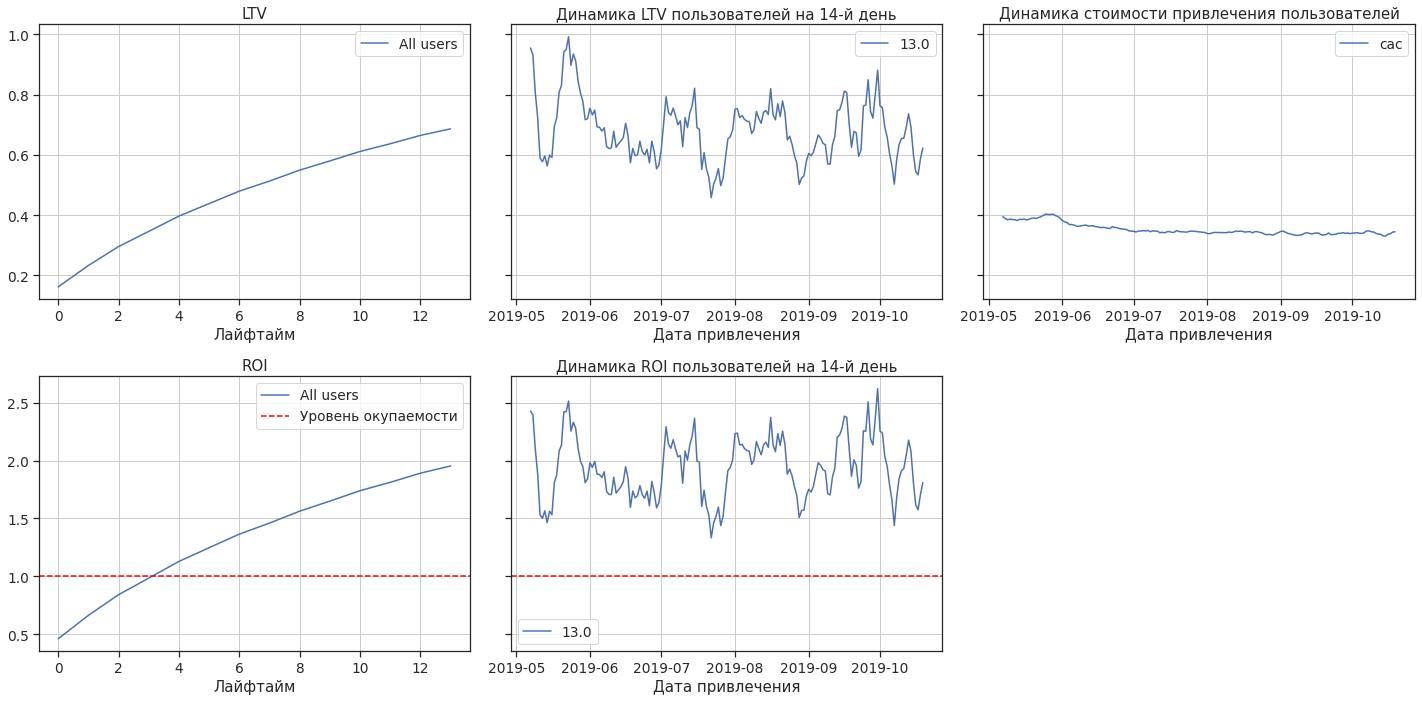

In [59]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


- Общая окупаемость наступает уже на **3** лайфтайм.
- Динамика **ROI** на 14-й день тоже показывает положительный график в интервале **1.5 - 2.5**
  

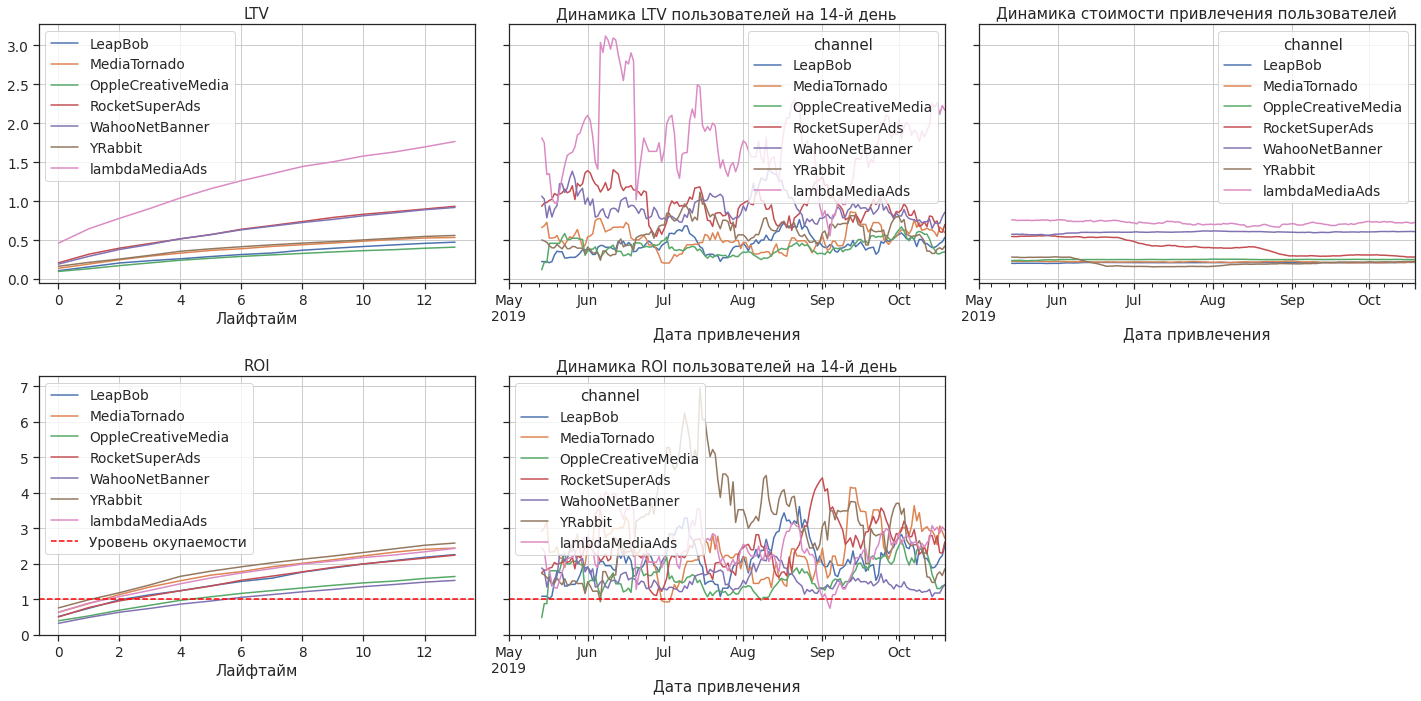

In [60]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


- Канал **LambdaMediaAds** показывает хорошую динамику **LTV**.
- Динамика **LTV** на 14-й день показывает сильную валатильность по каналу **LambdaMediaAds** в значениях от **1** до **3**.
- Показатель **ROI**, даже самого *отстающего* канала, пересекает порог рентабельности уже на **5** день.
  

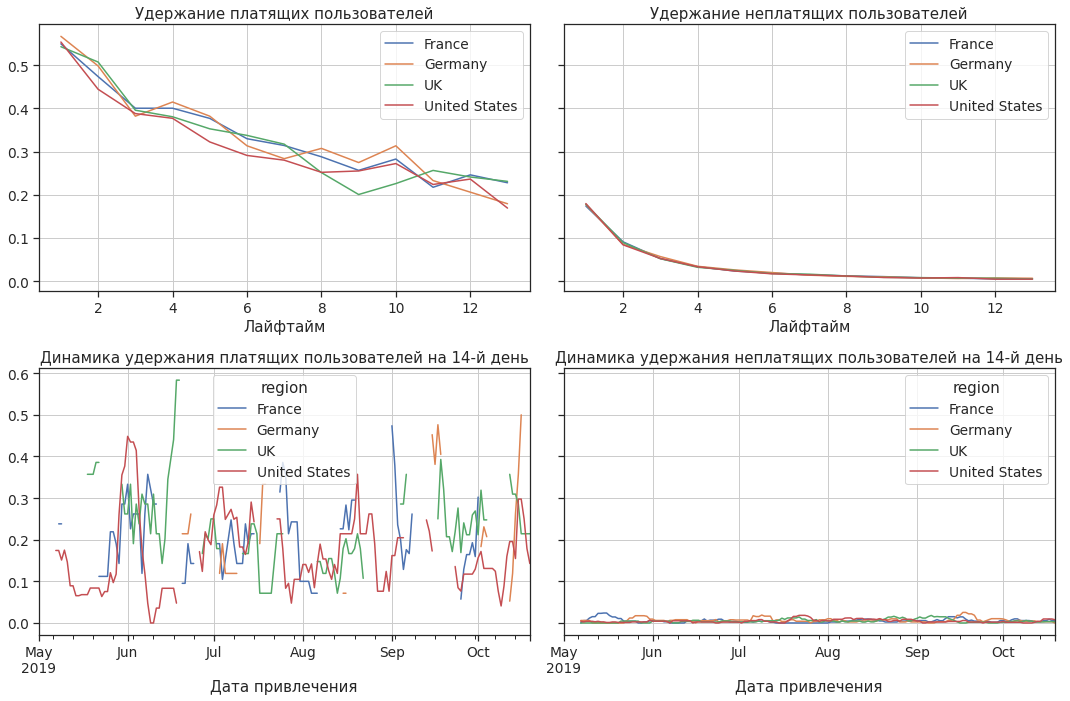

In [61]:
# смотрим удержание с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)


- Гравик удержания теперь тоже не без надежен, **United States** и **Европа** идут в связке.
   

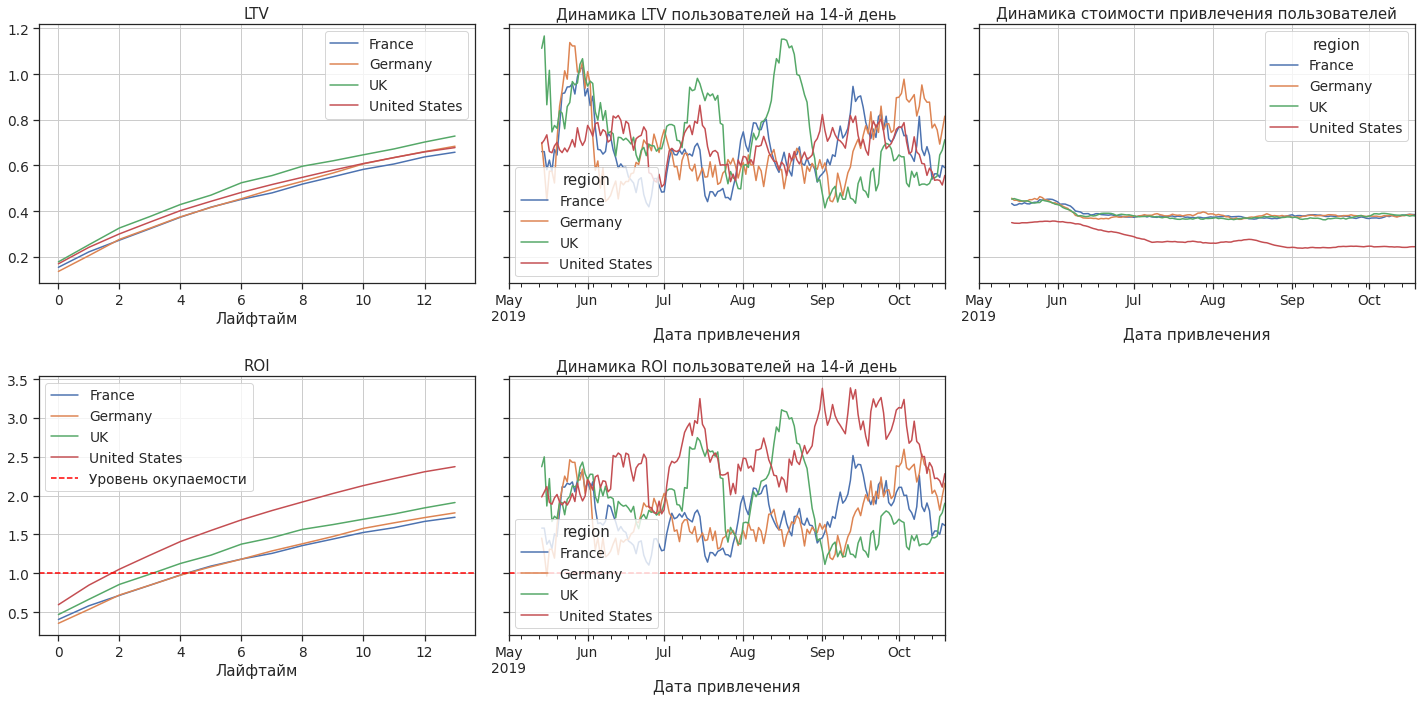

In [62]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


- **ROI** по **United States** окупается уже на **2-й** день, а вся **Европа** выходит в **+** уже на **5-й**.
- Динамика стоимости по **United States** показывает не только более низкие значения чем в **Европе**, но тренд на снижение.
- Динамика **ROI** на 14-й день по по **United States** более положительная чем в **Европе**.
  

### Итоговый вывод 

<div style="border:solid green 2px; padding: 5px">
<div class="alert alert-info">
    
Мы исследовали эффективность инвистиций на рекламу в приложении **Procrastinate Pro+**.
*******************
**1. Загрузка и предобработка данных:**
- Мы загрузили три датасета. Файл `visits` хранит лог сервера с информацией о посещениях сайта, файл `orders` с информацией о заказах  и файл `costs` с информацией о расходах на рекламу.
- Проверка файлов на наличие пропусков и дубликатов, таковых не выявила.
- В целях соблюдения стилистического правила, скорректировали название колонок по нижнему регистру.
    
**2. В целях дальнейшей оптимизации расчетов написали функции для расчета показателей и составления графиков:**
- Функция `get_profiles()` для создания профилей пользователей.
- Функция `get_retention()` для подсчёта Retention Rate.
- Функция `get_conversion()` для подсчёта конверсии.
- Функция `get_ltv()` для подсчёта LTV.
- Функция `filter_data()` для сглаживания данных.
- Функция `plot_retention()` для построения графика Retention Rate.
- Функция `plot_conversion()` для построения графика конверсии.
- Функция `plot_ltv_roi` для визуализации LTV и ROI.
    
**3. Провели исследовательский анализ, в результате которого выявили:**
- Отпеределили минимальную **(01 мая 2019)** и максимальную **(27 октября 2019)** даты привлечения пользователей. Они соответствуют интервалу указанному в задаче.
- Общее количество пользователей **150 008** человек.
- На долю **United States** приходится **66.66%** всех пользователей, оставшиеся три региона **UK, France и Germany** можно определить как **Европа**, доли в которой распределены практически равномерно.
- Доля платящих в **United States** составляет **6.9%**, что почти в **2** раза выше чем в европейских странах.
- По устройствам лидируют мобильные устройства, на первом месте **iPhone** с **36,31%**, но в целом пользователи устройств на системе **iOS** являются платильщиками чаще, в среднем на **0.5%**.
- **Органические** пользователи составляют **37.6%** от общего числа, из которых **2%** платильщики.
- **FaceBoom** является не только лиделом среди платных каналов по количеству пользователей, их **19.4%** от общего числа, но и лиделом по соотношению платильщиков, их **12.2%**.
- На **TipTop** приходится **13%** из которых **9.6%** платильщики, остальные каналы занимают доли не превышающие **5%** порог.
- **5 из 10** каналов, располагаются в **United States**. Остальные каналы представлены по всей **Европе** и имеют довольно ровное распределение.
    
**4. Проанализировали маркетинговые данные (расходы, распределения и стоимость привлечения):**
- Общие расходы на рекламу составили **105 497**.
- Показатель **САС** для всего пректа составил **1.12**, что свидетельствует об общей **убыточности**.
- **3 из 10** каналов привличения **(TipTop, FaceBoom и AdNonSense)**, **превышают** границу рентабельности.
- С мая по сентябрь, расходы на привлечение **выросли** более чем в **2 раза**.
- Основное увеличение расходов отмечаем по каналу **TipTop**
- На два канала лидера **TipTop и FaceBoom** приходится **82,6%** всего рекламного бюджета.
    
**5. Проанализировали окупаемость в разрезе влияющих факторов:**
- Общее **ROI** по достижению **14** дней, показывает значение **0.8** к момету рентабельности. *Реклама не окупается*.
- Общее **ROI** в динамике на **14-й** день показывает снижение. В середине мая падение до уровня *себестоимости*, потом рост до уровня **1.2** на протяжении **2** недель и новое падение которое опустилось ниже уровня себестоимости, к отметки **0.9**. По итогу, с середены июля **ROI** стабильно ниже уровня рентабильности.
- Общее **CAC** показывает противоположную динамику от **ROI**. В середине мая стоимость привлечения показывает резкий рост (пик приходится на дату падения в уровень себестоимости), а далее стабильный рост в течении 4 месяцев.
- **ROI** привлечение для **PC** окупается уже через 11 дней. **Android** на 13 день показывает показатель в **0.9**, а пользователи **iOS** платформ не превышают показатель в **0.7**.
- **CAC** с середины мая сильно вырос для **iOS** платформ, **Android** тоже подорожал но не так сильно. Стоимость привлечения пользователей на **PC** пострадала менее всего.
- **ROI** в динамике на **14** день, показывает положительные показатели только у **PC**, но и они проваливаются ниже уровня во второй половине июля, потом следует подъем в течении августа и с сентября они уже тоже за порогом рентабельности.
- **LTV** стабилен и самые высокие показатели у **United States**
- **ROI** у **United States** не выходит за рамки себестоимости, а так как это самый многочисленный (по количеству пользователей) регион, своими убытками он перекрывает прибыть оставшихся.
- **САС** у **United States** показывает резкий рост с середины июня, по **Европе** отмечаем незначительное падение с конца мая по середину июня, а далее показатель стабилен.
- в динамике **ROI** на 14 день, отмечаем сильную валатильность в **UK** в июне, июле и августе, в сентябре валатильность низкая. Все европейские страны, показывают положительный показатель, что не скажешь в отношении **United States**, он стабильно за порогом рентабельности с конца мая.
- **CAC** показывает ступенчатый рост по каналу **TipTop**.
- **ROI** по каналам **TipTop, FaseBoom и AdNonSense** ниже себестоимости. А вот канал **YRaddit** в первую половину июля показал резкий рост.
    
**6. Проанализировали конверсию и удержание в разрезе влияющих факторов:**
- Конверсия пользователей **iOS** (iPhone и Mac) выше чем пользователей на **Android**.
- В отличии от конверсии график удержания показывает противоположную картину. Пользователи **PC** и **Android** удерживаются лучше чем пользователи на **iOS** (iPhone и Mac).
- Конверсия пользователей по каналу **FaceBoom** выше остальных, но как и большая часть каналов, после небольшого подъема к **2-му** лайфтайму показывает стагнацию и ложится в горизонт.
- Наблюдается падение в удержании по каналам **FaceBoom и AdNonSense**.
- Динамика удержания на **14-й** день показывает практически горизонтальный график по каналу **FaceBoom**, а у **TipTop** колебания от **1.5** до **3** практически каждый месяц.
- Конверсия пользователей по региону **United States** выше остальных почти в **2** раза.
- Динамика конверсии на **14-й** день показывает хорошую активность **United States** с середины мая и далее каждые **4** недели видим рост и падение в интервале **0.08 - 0.11**. **Европа** наоборот показывает снижение с середины мая с уровня **0.09** до интервала **0.03 - 0.06**.
- Наблюдаем падение в удержании по региону **United States**, а вот **Европа** показывает более положительную динамику в среднем на **0.1**
- Динамика удержания на **14-й** день по региону **United States** показывает слабую валатильность, в отличии от **Европы**.
    
**7. Проверка гипотизы:**\
    На основании полученных данных, мы можем сделать вывод, что основной причиной плохой рентабильности компании, это отрицательные показатели по трем каналам привлечения **(TipTop, FaceBoom и AdNonSense)**. В **TipTop** с июня сильно выросла стоимость привлечения **(на 350%)**, а по **FaceBoom и AdNonSense** она стабильна, но за рамками рентабельности. Дополнительный негативный фактор, это плохое удержание по каналам **FaceBoom и AdNonSense** в среднем на **0.3**.\
    В целях проверки наших выводов, мы исключим **три токсичных конала** из выборки и посмотрим на экономические показатели.
- Общая окупаемость наступает уже на **3** лайфтайм.
- Динамика **ROI** на 14-й день тоже показывает положительный график в интервале **1.5 - 2.5**
- Показатель **ROI**, даже самого *отстающего* канала, пересекает порог рентабельности уже на **5** день.
- Гравик удержания по регионам показывает, что **United States** и **Европа** идут в связке.
- **ROI** по **United States** окупается уже на **2-й** день, а вся **Европа** выходит в **+** уже на **5-й**.
- Динамика стоимости по **United States** показывает не только более низкие значения чем в **Европе**, но тренд на снижение.
- Динамика **ROI** на 14-й день по по **United States** более положительная чем в **Европе**.
    
    Таким образом наши выводы подтвердились.
    
**************************
**Рекомендации:**
1. Пересмотреть сотрудничество с каналами **TipTop, FaceBoom и AdNonSense**, так как стоимость привлечения по этим каналам очень высокая.
2. В целом **ROI** в **United States** выше чем в **Европе**, а **САС** ниже, поэтому стоит рассмотреть деверсификацию каналов в этом регионе. Из уже действующих, можно обратить внимание на **RocketSuperAds**, доля платильщиков у него составляет **7.9%**, что говорит о более удачной выборки целевой аудитории.
3. Дополнительно изучить причину хорошей конвертации пользователей на системах **iOS**, но плохого последующего удержания, возможно причины в приложениях. Техническому отделу необходимо изучить ошибки и проанализировать отзывы.
3. Дополнительно изучить причину хорошего удержания пользователей **PC**, так как показатели **ROI** у них выше чем у мобильных устройств. Возможно функциональность приложений сильно урезана в отличии от версии для ПК.
4. Необходимо обратить внимание на **органических** пользователей, их доля от общего числа составляет **37.6%** и не смотря на низкую долю платильщиков, которая составляет **2%**, она по количеству пользователей с лихвой превышает показатели остальных каналов в среднем в **3-4** раза. Необходимо произвести опрос этих пользователей для выявления источника рекламы, это могут быть рекомендации знакомых или ресурсы не охваченные рекламой.

</div>